# Data Preprocessing

This notebook cleans the dataset and prepares it for feeding the machine learning model.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set data directory for either local or cloud execution

In [3]:
data_dir = ""

In [112]:
#  Mount data dtive for Google-Colab
# from google.colab import drive
# import nbformat
# from nbconvert import HTMLExporter
# drive.mount('/content/drive')
# data_dir = "/content/drive/My Drive/Fontys/SUE/data/"

Load the 4 different datasets from [4TU.researchdata](https://data.4tu.nl/articles/dataset/AssureMOSS_Kubernetes_Run-time_Monitoring_Dataset/20463687)

In [113]:
df_2021_may_malicious = pd.read_csv(data_dir + 'elastic_may2021_malicious_data.csv')
df_2021_may_malicious.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKauwfwKhUn/AjZuY,False,190.215.171.15,53.181.147.225,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579731159,9200.0,58982.0,benign
1,EAT/////AP//////CP8AAAHAqFSfwKhUoGbm8CM,False,190.215.171.15,190.215.171.36,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579679339,9200.0,58982.0,benign
2,EAT/////AP//////CP8AAAEKauwfwKhUn/AjBOY,False,190.215.171.15,53.181.147.225,200483.0,tcp,2021-05-23T13:57:50.000Z,1320002683772,9200.0,58884.0,benign


In [114]:
df_2021_may_benign = pd.read_csv(data_dir + 'elastic_may2021_benign_data.csv')
df_2021_may_benign.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjsoo,False,190.215.171.14,53.179.129.5,950151,tcp,2021-05-20T16:06:50.195Z,5098334271960,9200.0,35506.0,benign
1,EAT/////AP//////CP8AAAHAqFSdwKhUnvAjsoo,False,190.215.171.14,190.215.171.13,950151,tcp,2021-05-20T16:06:50.195Z,5098334225330,9200.0,35506.0,benign
2,EAT/////AP//////CP8AAAEKbmGBwKhUnvAjqIo,False,190.215.171.14,53.179.129.5,5432972,tcp,2021-05-20T16:06:50.195Z,5098333570147,9200.0,35496.0,benign


In [115]:
df_2022_february = pd.read_csv(data_dir + 'elastic_february2022_data.csv')
df_2022_february.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAD/////AP////////8AAAGsEAILrBACDA,False,240.16.203.232,240.16.203.236,72096053,NaN,2022-02-25T12:20:00.007Z,41753051589,NaN,NaN,benign
1,EAD/////AP////////8AAAGsEAIKrBACDA,False,240.16.203.236,240.16.203.233,913734,NaN,2022-02-25T12:20:00.007Z,35268442180,NaN,NaN,benign
2,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign


The may2022 dataset, has a different csv separator and includes an extra feature: _source_network_packets

In [116]:
df_2022_may = pd.read_csv(data_dir + 'elastic_may2022_data.csv', sep=';')
df_2022_may.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,_source_network_packets,label
0,EAT/////AP//////CP8AAAEKAAIPwKj3BYUDAQg,False,95.180.199.26,244.121.253.144,476424919,tcp,2022-05-04T14:37:10.271Z,509449510838,901.0,2049.0,163635,benign
1,EAT/////AP//////CP8AAAHAqFSXwKj3Fk6XVCQ,False,95.180.199.6,95.180.91.120,158570149,tcp,2022-05-04T14:37:10.271Z,509446479326,38734.0,9300.0,15604,benign
2,EAT/////AP//////CP8AAAHAqFSAwKj3BYYDAQg,False,95.180.91.98,95.180.199.26,855437751,tcp,2022-05-04T14:37:10.271Z,509452160653,2049.0,902.0,334165,benign


Lets create a dataset version of the merged datasets before any manipulation (ignoring the _source_network_packets feature as this only appears on may2022 data)

In [117]:
df = pd.concat([df_2022_february, df_2022_may, df_2021_may_benign, df_2021_may_malicious], ignore_index=True, join="inner")
print(df.shape)
df.head(3)

(5090910, 11)


,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAD/////AP////////8AAAGsEAILrBACDA,False,240.16.203.232,240.16.203.236,72096053.0,NaN,2022-02-25T12:20:00.007Z,41753051589,NaN,NaN,benign
1,EAD/////AP////////8AAAGsEAIKrBACDA,False,240.16.203.236,240.16.203.233,913734.0,NaN,2022-02-25T12:20:00.007Z,35268442180,NaN,NaN,benign
2,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,benign


## Exploring missing data

First we check which columns have missing values.

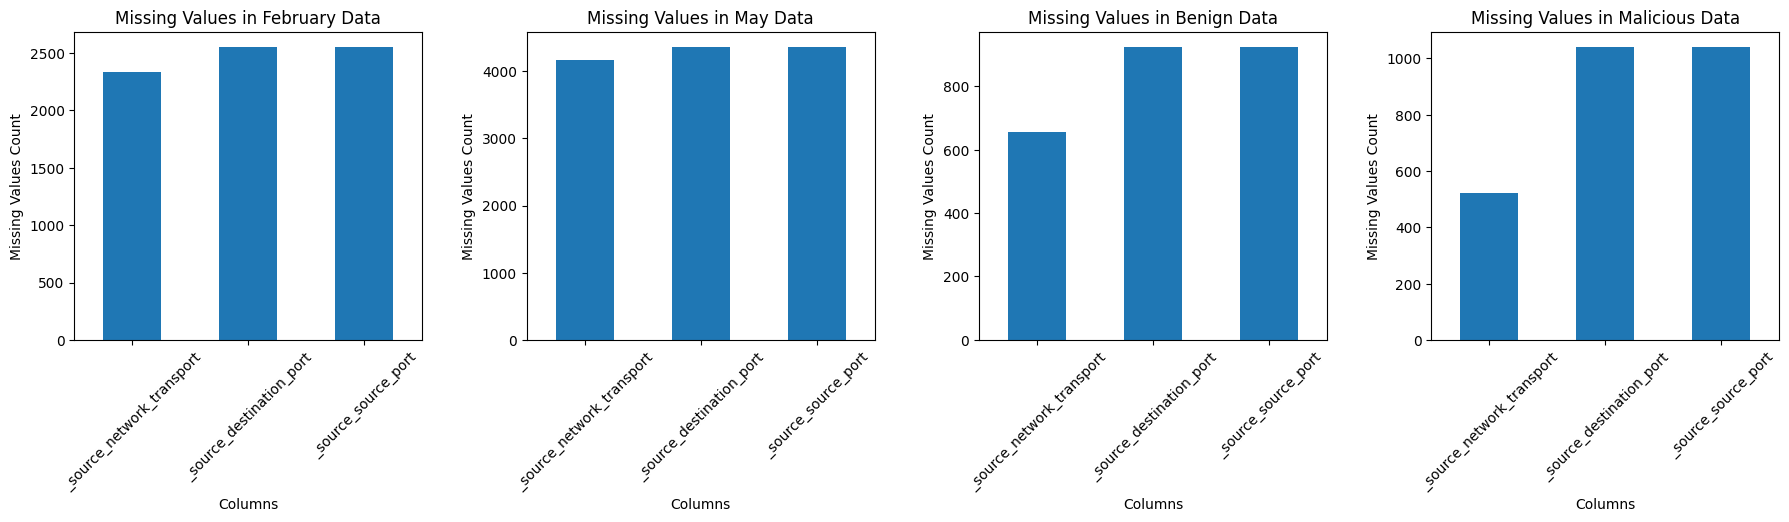

In [118]:
missing_values_february = df_2022_february.isnull().sum()[df_2022_february.isnull().sum() > 0]
missing_values_may = df_2022_may.isnull().sum()[df_2022_may.isnull().sum() > 0]
missing_values_benign = df_2021_may_benign.isnull().sum()[df_2021_may_benign.isnull().sum() > 0]
missing_values_malicious = df_2021_may_malicious.isnull().sum()[df_2021_may_malicious.isnull().sum() > 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

# Create bar plots for each DataFrame
for i, (missing_values, title) in enumerate(zip(
        [missing_values_february, missing_values_may, missing_values_benign, missing_values_malicious],
        ['February Data', 'May Data', 'Benign Data', 'Malicious Data'])):
    missing_values.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Missing Values in {title}')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Missing Values Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

plt.show()

In this case there are only 3 columns - network_transport, destination_port and source_port

## Data Balancing

Graph the difference in benign vs malicious between datasets

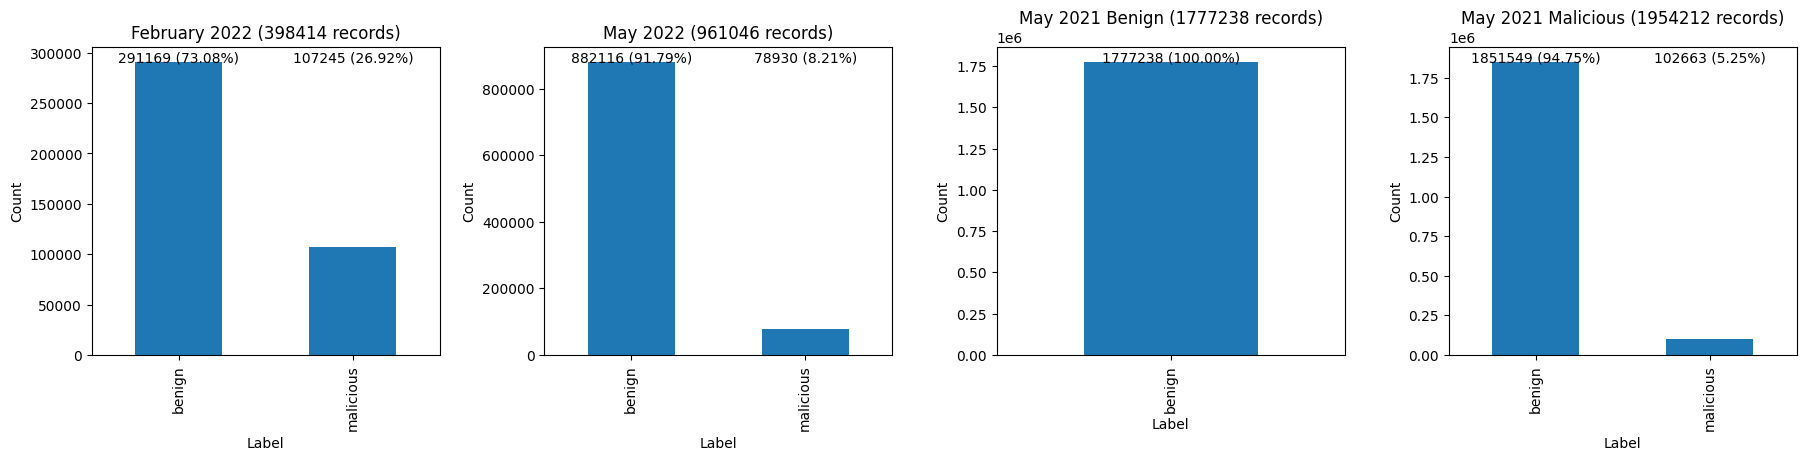

In [119]:
# Printing the value count for each label - malicious and benign
value_counts_2022_february = df_2022_february['label'].value_counts()
value_counts_2022_may = df_2022_may['label'].value_counts()
value_counts_2021_may_benign = df_2021_may_benign['label'].value_counts()
value_counts_2021_may_malicious = df_2021_may_malicious['label'].value_counts()

dataframe_map = [df_2022_february, df_2022_may, df_2021_may_benign, df_2021_may_malicious]

# Create a figure with one subplot
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

for i, (value_counts, title) in enumerate(zip(
        [value_counts_2022_february, value_counts_2022_may, value_counts_2021_may_benign, value_counts_2021_may_malicious],
        [f'February 2022 ({len(df_2022_february)} records)', 
         f'May 2022 ({len(df_2022_may)} records)', 
         f'May 2021 Benign ({len(df_2021_may_benign)} records)', 
         f'May 2021 Malicious ({len(df_2021_may_malicious)} records)'])):

    value_counts.plot(kind='bar', ax=axes[i])

    # Calculate percentages
    total_samples = len(dataframe_map[i])
    percentages = (value_counts / total_samples) * 100

    # Customize the plot
    axes[i].set_title(title)
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel('Count')

    # Add percentages above the bars
    for j, pct in enumerate(percentages):
        axes[i].text(j, value_counts.iloc[0] + 5, f'{value_counts.iloc[j]} ({pct:.2f}%)', ha='center')

# Adjust the subplots' positions for better readability
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


We can observe that the rows with benign label are much more compared to the malicius, meaning the dataset is highly disbalanced.

C:\Users\Thomas\AppData\Local\Temp\ipykernel_9520\1150387159.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')


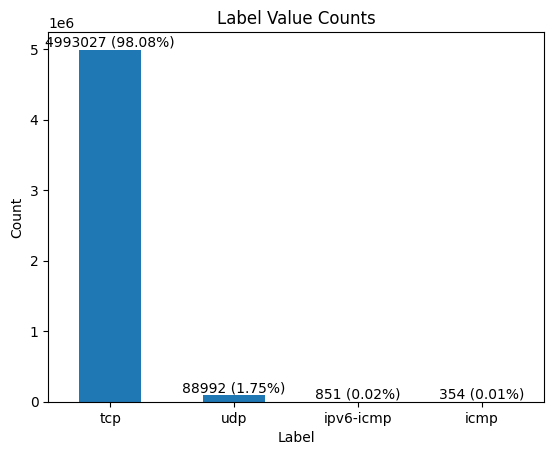

In [120]:
value_counts = df['_source_network_transport'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

ax.set_title('Label Value Counts')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Besides, the label, there is also the TCP vs UDP transport split that shows an imbalance in the dataframe between types of networking records

## Merging datasets

In [121]:
df.isnull().sum()[df.isnull().sum() > 0]

_source_network_transport    7686
_source_destination_port     8891
_source_source_port          8891
dtype: int64

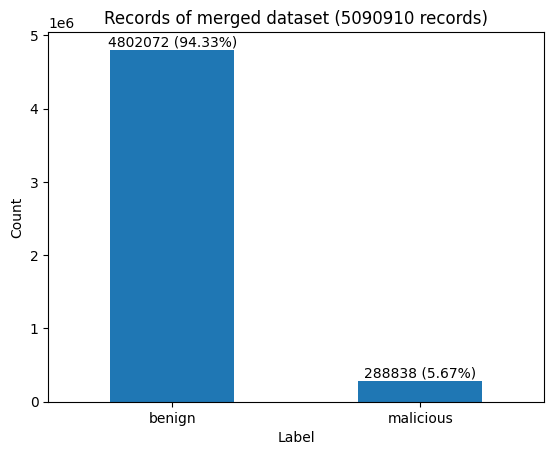

In [122]:
value_counts = df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(df)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Verify that the datasets were concatenated properly

In [123]:
assert len(df) == len(df_2022_february) + len(df_2022_may) + len(df_2021_may_benign) + len(df_2021_may_malicious)

## Data Cleaning

For cleaning the data, we will remove all the NaN values, and see how that effects the distribution, above we had already computed the 3 features with missing values.

In [124]:
df_cleaned = df.dropna()

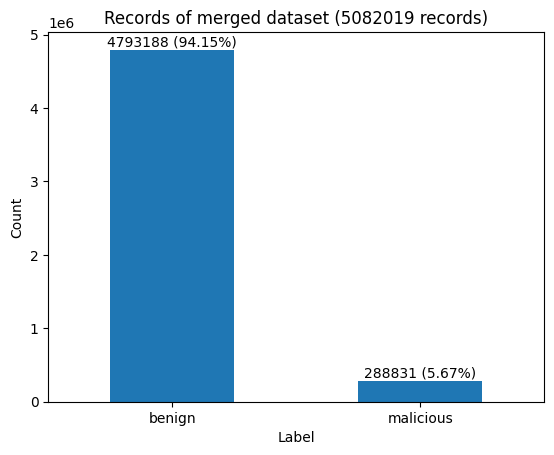

In [125]:
value_counts = df_cleaned['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(df_cleaned)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [126]:
len(df[df.isnull().any(axis=1)])

8891

The difference is very minimal, as there are only <9000 unique records with a missing value from the ~5.000.000 records

Verify all dataframes were correctly concatenatated by checking the length,  
and save the dataframe to a new csv file for later use

In [128]:
df_cleaned.to_csv(data_dir + 'merged_cleaned_data.csv', index=False)

## One Hot Encoding

In [25]:
df = pd.read_csv(data_dir + 'merged_cleaned_data.csv')
df.head(3)
encoded_df = df.copy()

The label can be one-hot-encoded into 0 and 1 for benign or malicious respectively

In [26]:
encoded_df['label'] = df['label'].map({'benign': 0, 'malicious': 1})
encoded_df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0


the network transport type can also be one-hot-encoded for udp and tcp values

In [27]:
encoded_df['udp'] = (encoded_df['_source_network_transport'] == 'udp').astype(int)
encoded_df['tcp'] = (encoded_df['_source_network_transport'] == 'tcp').astype(int)
encoded_df = encoded_df.drop(columns='_source_network_transport')
encoded_df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,0,1
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,0,1
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,0,1


Lets save this encoded model

In [28]:
encoded_df.to_csv(data_dir + 'merged_cleaned_encoded_data.csv', index=False)

## Flow records
records can also be grouped per flow, this way time-series-like information can be encoded into a single records, as often a single flow is malicious or benign

In [29]:
df = pd.read_csv(data_dir + 'merged_cleaned_encoded_data.csv')
df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,0,1
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,0,1
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,0,1


In [30]:
df[df['_source_flow_id'] == 'EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU']

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
146,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,2022-02-25T12:20:00.092Z,30066825097,5601.0,7625.0,0,0,1
452,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,2022-02-25T12:20:00.007Z,14839076349,5601.0,7625.0,0,0,1
708,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,408.0,2022-02-25T12:19:50.002Z,30066825097,5601.0,7625.0,0,0,1
960,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,544.0,2022-02-25T12:19:50.007Z,14839076349,5601.0,7625.0,0,0,1
1135,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,True,190.215.171.28,190.215.9.17,840.0,2022-02-25T12:20:40.092Z,45206860361,5601.0,7625.0,0,0,1
1342,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,2022-02-25T12:20:40.107Z,29712554471,5601.0,7625.0,0,0,1
1556,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,2022-02-25T12:19:40.002Z,14998853348,5601.0,7625.0,0,0,1
1859,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,272.0,2022-02-25T12:19:40.108Z,57160,5601.0,7625.0,0,0,1
2021,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,840.0,2022-02-25T12:20:30.002Z,45206860361,5601.0,7625.0,0,0,1
2262,EAT/////AP//////CP8AAAHAqFSAwKj3Dskd4RU,False,190.215.171.28,190.215.9.17,1408.0,2022-02-25T12:20:30.000Z,29712554471,5601.0,7625.0,0,0,1


In [6]:
import numpy as np

flow_df = df.copy()
# Convert the timestamp column to datetime type
flow_df['_source_@timestamp'] = pd.to_datetime(flow_df['_source_@timestamp'])
# Add a new column for the amount of packets
flow_df['packets'] = np.ones(len(flow_df))
# byte information for finding deviation
flow_df['min_network_bytes'] = flow_df['_source_network_bytes']
flow_df['max_network_bytes'] = flow_df['_source_network_bytes']
# duration information for finding deviation
flow_df['min_source_event_duration'] = flow_df['_source_event_duration']
flow_df['max_source_event_duration'] = flow_df['_source_event_duration']
# timestamp information for finding deviation
flow_df['min_source_timestamp'] = flow_df['_source_@timestamp']
flow_df['max_source_timestamp'] = flow_df['_source_@timestamp']
# source flow final count
flow_df['final_flow_count'] = flow_df['_source_flow_final']
# Squash the records
flow_df = flow_df.sort_values(by='_source_@timestamp', ascending=False).groupby('_source_flow_id')

squash_rules = {
    '_source_event_duration': 'sum',
    '_source_network_bytes': 'sum',
    'udp': 'first',
    'tcp': 'first',
    'packets': 'sum',
    'label': 'max', # max will be malicious if one was malicious otherwise benign
    # Extra feature values for calculating byte data
    'min_network_bytes': 'min',
    'max_network_bytes': 'max',
    # Extra feature values for calculating event duration
    'min_source_event_duration': 'min',
    'max_source_event_duration': 'max',
    # Extra feature values for calculating flow duration
    'min_source_timestamp': 'min',
    'max_source_timestamp': 'max',
    # Extra feature for the count of final flow records within a flow
    'final_flow_count': 'sum'
}

flow_df = flow_df.agg(squash_rules).reset_index()

In [7]:
print(flow_df.shape)
flow_df.head(3)

(237601, 13)


,_source_flow_id,_source_event_duration,_source_network_bytes,_source_network_transport,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,udp,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,udp,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,udp,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1


Now that the dataframe is squashed based on flow_id, we can calculate and rename any features that could be important

In [8]:
flow_df['duration'] = (flow_df['max_source_timestamp'] - flow_df['min_source_timestamp'])
flow_df.rename(columns={'_source_event_duration': 'source_event_duration', '_source_network_bytes': 'source_network_bytes_sum'})

,_source_flow_id,source_event_duration,source_network_bytes_sum,_source_network_transport,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count,duration
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,udp,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1,0 days 00:00:40
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,udp,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5,3 days 14:14:18.337000
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,udp,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1,0 days 00:00:30.005000
3,EAL/////AP////8I//8AAAEKAAIDCgACDzUA35Y,779242764,1208.0,udp,4.0,0,302.0,302.0,194810691,194810691,2022-02-25 13:38:20.108000+00:00,2022-02-25 13:38:50.020000+00:00,1,0 days 00:00:29.912000
4,EAL/////AP////8I//8AAAEKAAIDCgACDzUA37U,0,558.0,udp,6.0,0,93.0,93.0,0,0,2022-02-25 13:24:50.095000+00:00,2022-02-25 13:25:40.001000+00:00,1,0 days 00:00:49.906000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237596,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,616429,3956.0,tcp,23.0,0,172.0,172.0,22770,41937,2021-05-20 21:34:50.196000+00:00,2021-05-24 08:15:28.533000+00:00,5,3 days 10:40:38.337000
237597,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,600427,4988.0,tcp,29.0,0,172.0,172.0,15844,23174,2021-05-20 18:37:50.195000+00:00,2022-05-04 15:45:10.320000+00:00,6,348 days 21:07:20.125000
237598,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,172860,1376.0,tcp,8.0,0,172.0,172.0,20478,22737,2021-05-21 06:53:50.197000+00:00,2021-05-24 11:25:58.532000+00:00,2,3 days 04:32:08.335000
237599,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,220700,1720.0,tcp,10.0,0,172.0,172.0,21900,22325,2021-05-23 23:17:38.532000+00:00,2021-05-24 05:22:58.533000+00:00,2,0 days 06:05:20.001000


Lets also encode the tcp/udp protocol into separate features, just as the non-squashed-encoded dataset

In [9]:
flow_df['_source_network_transport'].unique()

array(['udp', 'tcp'], dtype=object)

In [14]:
flow_df['udp'] = (flow_df['_source_network_transport'] == 'udp').astype(int)
flow_df['tcp'] = (flow_df['_source_network_transport'] == 'tcp').astype(int)
flow_df = flow_df.drop(columns=['_source_network_transport'])
flow_df.head(3)

,_source_flow_id,_source_event_duration,_source_network_bytes,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count,duration,udp,tcp
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1,0 days 00:00:40,1,0
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5,3 days 14:14:18.337000,1,0
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1,0 days 00:00:30.005000,1,0


Now lets sanity check that the squashed flow df does not include any missing values

In [11]:
len(flow_df[flow_df.isnull().any(axis=1)])

0

Lets create a function that can be used to translate the encoded label to human string

In [12]:
def to_human_label(label):
    human_label = "Benign"
    if (label == -1): 
        human_label = "Malicious"
    return human_label

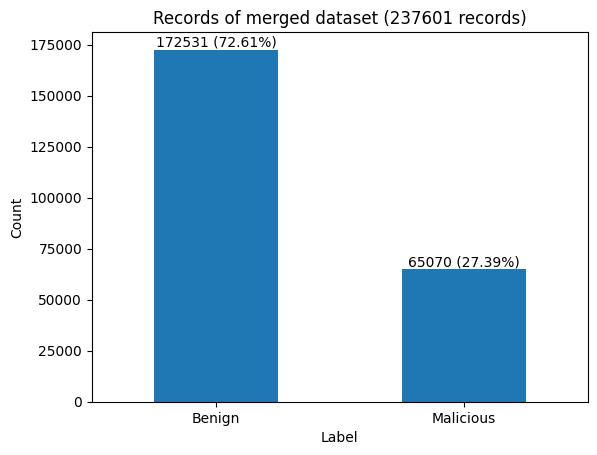

In [13]:
value_counts = flow_df['label'].value_counts()

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax)

total_samples = len(flow_df)
percentages = (value_counts / total_samples) * 100

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

ax.set_title(f'Records of merged dataset ({len(flow_df)} records)')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_xticklabels(['Benign', 'Malicious'])
plt.xticks(rotation=0)

plt.show()

In [173]:
flow_df.to_csv(data_dir + 'flow_data.csv', index=False)

## Train/Test split
Now that the datasets have been properly prosessed, a standardized train/test split can be created.  
There are two kinds of datasets that might be used, the per packet one or the flow squashed version.

In [183]:
import pandas as pd

if (data_dir is None): data_dir = ''

In [188]:
def show_label_split(df, title = ""):
    value_counts = df['label'].value_counts()
    fig, ax = plt.subplots()

    value_counts.plot(kind='bar', ax=ax)

    total_samples = len(df)
    percentages = (value_counts / total_samples) * 100

    for i, count in enumerate(value_counts):
        ax.text(i, count, f'{count} ({percentages.iloc[i]:.2f}%)', ha='center', va='bottom')

    ax.set_title(f'{title} ({len(df)} records)')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['Benign', 'Malicious'])
    plt.xticks(rotation=0)

    plt.show()

### Per Packet dataset


In [176]:
df = pd.read_csv(data_dir + 'merged_cleaned_encoded_data.csv')
df.head(3)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,tcp,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,0,1
1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,tcp,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,0,1
2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,tcp,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,0,1


In [181]:
train_df = df.sample(frac = 0.8)
test_df = df.drop(train_df.index)

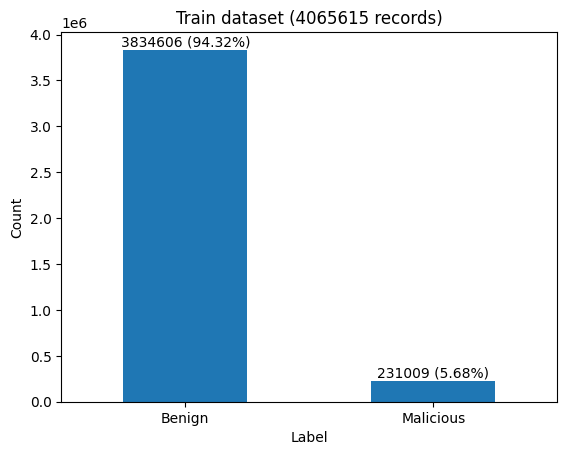

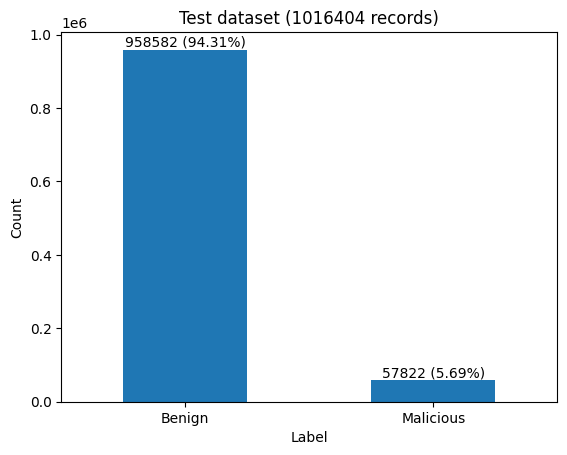

In [189]:
show_label_split(train_df, "Train dataset")
show_label_split(test_df, "Test dataset")

The train and test dataset both have an evenly split of 95:5 %, which should closely represent a realistic senario

Now lets save these split model, so they can be used in other notebooks

In [190]:
train_df.to_csv(data_dir + 'train_data.csv')
test_df.to_csv(data_dir + 'test_data.csv')

## Per Flow dataset

In [191]:
df = pd.read_csv(data_dir + 'flow_data.csv')
df.head(3)

,_source_flow_id,_source_event_duration,_source_network_bytes,packets,label,min_network_bytes,max_network_bytes,min_source_event_duration,max_source_event_duration,min_source_timestamp,max_source_timestamp,final_flow_count,duration
0,EAL/////AP////8I//8AAAEAAAAA/////0QAQwA,0,1690.0,5.0,0,338.0,338.0,0,0,2021-05-23 15:38:08.533000+00:00,2021-05-23 15:38:48.533000+00:00,1,0 days 00:00:40
1,EAL/////AP////8I//8AAAEKAAICCgACD0MARAA,503552,23288.0,27.0,0,592.0,924.0,0,30254,2021-05-21 01:24:40.195000+00:00,2021-05-24 15:38:58.532000+00:00,5,3 days 14:14:18.337000
2,EAL/////AP////8I//8AAAEKAAIDCgACDzUA+dU,1763084,744.0,4.0,0,186.0,186.0,440771,440771,2022-05-04 16:40:40.320000+00:00,2022-05-04 16:41:10.325000+00:00,1,0 days 00:00:30.005000


In [192]:
train_df = df.sample(frac = 0.8)
test_df = df.drop(train_df.index)

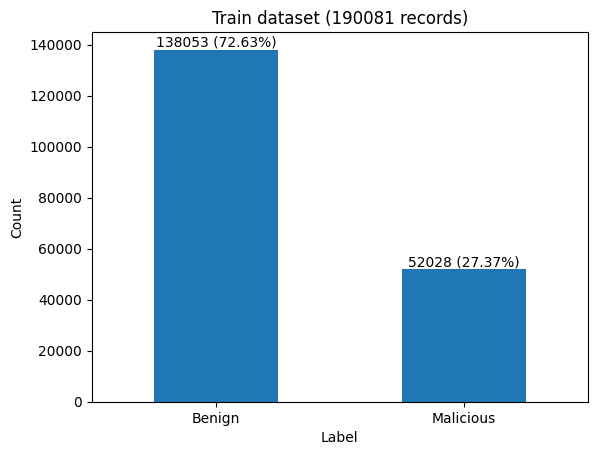

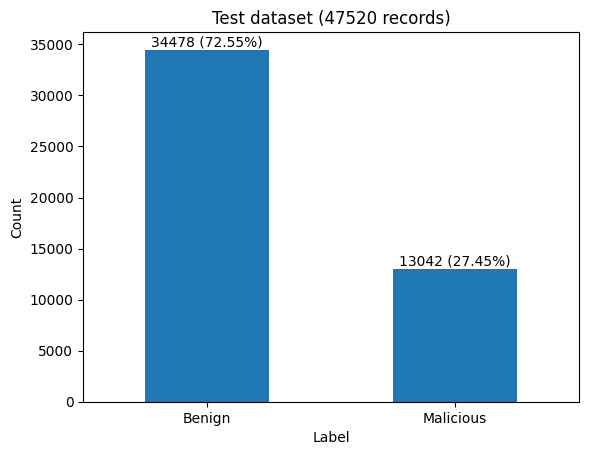

In [193]:
show_label_split(train_df, "Train dataset")
show_label_split(test_df, "Test dataset")

the flow dataset split is closer to 75:25 % in benign vs malicious, as from exploration it was found that in general benign flows contain much more packets than malicious, so when packets are merged the ratio between benign and malicious becomes smaller.

In [194]:
train_df.to_csv(data_dir + 'train_flow_data.csv')
test_df.to_csv(data_dir + 'test_flow_data.csv')

#### NOTE: All dataset csv files are managed with DVC and stored in the remote AWS S3 bucket, allowing any dataset to be directly pulled using dvc (see README for how this can be done)

In [ ]:
# Google-colab export to HTML
# # Load the notebook
# with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.ipynb", "r", encoding="utf-8") as f:
#     notebook = nbformat.read(f, as_version=4)

# # Convert to HTML
# html_exporter = HTMLExporter()
# html_data, _ = html_exporter.from_notebook_node(notebook)

# # Save the HTML data to a file
# with open("/content/drive/MyDrive/Fontys/SUE/datapreprocessing.html", "w", encoding="utf-8") as f:
#     f.write(html_data)